In [0]:
import os
import cv2
import io
import pickle
import requests
import zipfile
import numpy as np
from scipy import ndimage
from skimage.transform import resize
from imageio import imread, imsave
from skimage import img_as_float, color, exposure
from skimage.feature import peak_local_max, hog
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.svm import LinearSVC
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split
%matplotlib inline

In [0]:
r = requests.get('https://github.com/mf00589/COM2028/raw/master/TrainingForEng&Russian.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [0]:
DATADIR = './TrainingForEng&Russian/training_type/'
CATEGORIES = ['1','2','3','4','5','6','7','8','9','a','a1','a3','a4','a6','a7','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

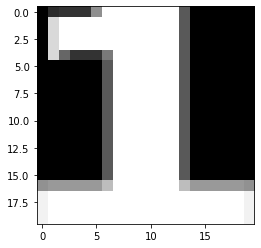

In [0]:
for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(img_array)
    plt.show()
    break
  break


In [0]:
print(img_array.shape)

(20, 20, 3)


In [0]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      new_array = cv2.resize(img_array, (200,200))
      training_data.append([new_array, class_num])

create_training_data()

In [0]:
print(len(training_data))

2886


In [0]:
import random 

random.shuffle(training_data)

In [0]:
for sample in training_data[:10]:
  print(sample[1])

28
28
22
22
25
9
30
38
18
26


In [0]:
X = []
y = []

In [0]:
for features, label in training_data:
  X.append(features)
  y.append(label)


X = np.array(X).reshape(-1, 200 , 200)

In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [0]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)


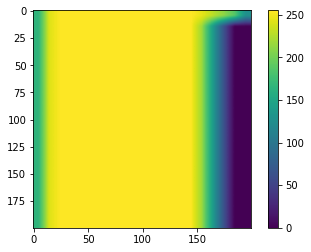

22


In [0]:
X.shape[1:]
#print(len(y))
#print(len(X))
plt.figure()
plt.imshow(X[2])
plt.colorbar()
plt.grid(False)
plt.show()

print(y[2])
import tensorflow as tf
from tensorflow import keras

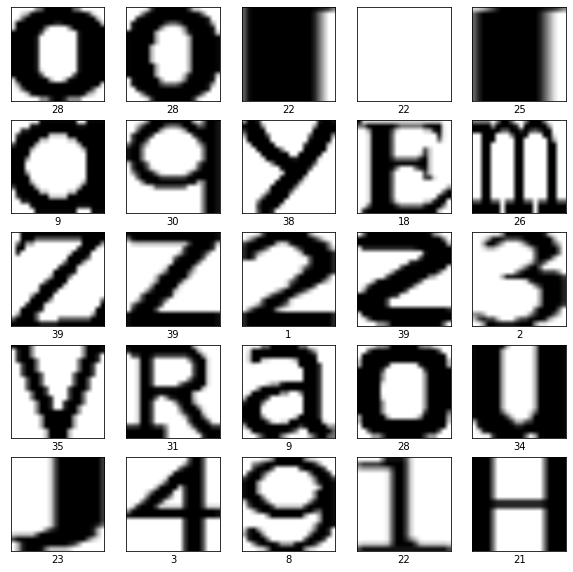

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    plt.xlabel(y[i])
plt.show()

In [0]:
X = X / 255.0
X.shape

y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(200, 200)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(40)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
68/68 [==============================] - 2s 35ms/step - loss: 4.4211 - accuracy: 0.3244 - val_loss: 1.6807 - val_accuracy: 0.5471
Epoch 2/10
68/68 [==============================] - 2s 35ms/step - loss: 1.3407 - accuracy: 0.6599 - val_loss: 1.2930 - val_accuracy: 0.6870
Epoch 3/10
68/68 [==============================] - 2s 36ms/step - loss: 0.9888 - accuracy: 0.7431 - val_loss: 1.0921 - val_accuracy: 0.7590
Epoch 4/10
68/68 [==============================] - 2s 35ms/step - loss: 0.7431 - accuracy: 0.8152 - val_loss: 0.8419 - val_accuracy: 0.8144
Epoch 5/10
68/68 [==============================] - 2s 36ms/step - loss: 0.5113 - accuracy: 0.8637 - val_loss: 0.8594 - val_accuracy: 0.7881
Epoch 6/10
68/68 [==============================] - 2s 34ms/step - loss: 0.3891 - accuracy: 0.8988 - val_loss: 0.7583 - val_accuracy: 0.8283
Epoch 7/10
68/68 [==============================] - 2s 35ms/step - loss: 0.3921 - accuracy: 0.8896 - val_loss: 0.8184 - val_accuracy: 0.8352
Epoch 8/10
68

In [0]:
print(len(X_train))

2164


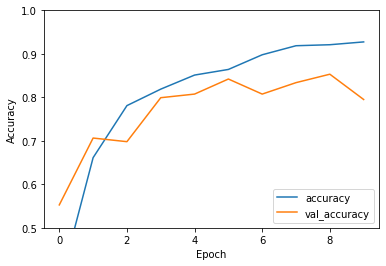

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')